In [13]:
# Standard stuff
import numpy as np
import pandas as pd

# imports for data transformation and model
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# viz libraries
import matplotlib.pyplot as plt

# sql alchemy for connecting to database
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

# EDA
from string import ascii_letters
import seaborn as sns


import os

In [14]:
file_path = "Data/cleaned_tracks.csv"
df = pd.read_csv(file_path)
df.head(10)

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,decades
0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,1922,0.645,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,2010's
1,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922,0.434,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,2010's
2,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922,0.321,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,2010's
3,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,2010's
4,5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.227,...,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,2010's
5,6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,Francis Marty,2nuMRGzeJ5jJEKlfS7rZ0W,1922,0.510,...,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,2010's
6,7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,Mistinguett,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,...,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,2010's
7,8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,Greg Fieler,5nWlsH5RDgFuRAiDeOFVmf,1922,0.488,...,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,2010's
8,9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922,0.548,...,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,2010's
9,10,0OYGe21oScKJfanLyM7daU,Capítulo 2.8 - Banquero Anarquista,0,99100,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,1922,0.676,...,-22.447,0,0.9600,0.794,0.000000,0.2100,0.7240,96.777,3,2010's


In [15]:
# Compute Correlation
corr = df.corr()
corr

,Unnamed: 0,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,-0.007201,0.004706,0.021463,0.309717,0.046142,0.125158,0.004087,0.124607,-0.020894,0.050354,-0.104446,-0.120033,0.031281,0.010347,0.019929,0.006268
popularity,-0.007201,1.000000,0.025497,0.211640,0.589195,0.187493,0.300994,0.015159,0.327873,-0.033903,-0.044488,-0.369391,-0.237793,-0.049207,0.002434,0.070906,0.083010
duration_ms,0.004706,0.025497,1.000000,-0.017846,0.051354,-0.121589,0.022502,0.004400,-0.004328,-0.028248,-0.117997,-0.061304,0.069626,0.005302,-0.165971,-0.003559,0.012495
explicit,0.021463,0.211640,-0.017846,1.000000,0.208343,0.151295,0.122163,0.010747,0.134376,-0.051721,0.107847,-0.148386,-0.067585,-0.012764,-0.017664,0.005079,0.048697
release_date,0.309717,0.589195,0.051354,0.208343,1.000000,0.228025,0.459713,0.023909,0.448277,-0.082072,-0.076952,-0.527535,-0.223901,-0.020739,-0.027846,0.120300,0.110043
danceability,0.046142,0.187493,-0.121589,0.151295,0.228025,1.000000,0.236839,0.018717,0.246684,-0.045440,0.195628,-0.241038,-0.221508,-0.108490,0.524353,-0.050988,0.142358
energy,0.125158,0.300994,0.022502,0.122163,0.459713,0.236839,1.000000,0.036121,0.765330,-0.065489,-0.050671,-0.715726,-0.194593,0.126000,0.369236,0.227208,0.179707
key,0.004087,0.015159,0.004400,0.010747,0.023909,0.018717,0.036121,1.000000,0.026636,-0.129398,0.000236,-0.027681,-0.007184,-0.006738,0.019923,0.004302,0.007487
loudness,0.124607,0.327873,-0.004328,0.134376,0.448277,0.246684,0.765330,0.026636,1.000000,-0.041311,-0.162251,-0.520847,-0.329772,0.031201,0.270407,0.184390,0.132790
mode,-0.020894,-0.033903,-0.028248,-0.051721,-0.082072,-0.045440,-0.065489,-0.129398,-0.041311,1.000000,-0.018654,0.059050,-0.010063,0.007444,0.011394,0.008012,-0.019459


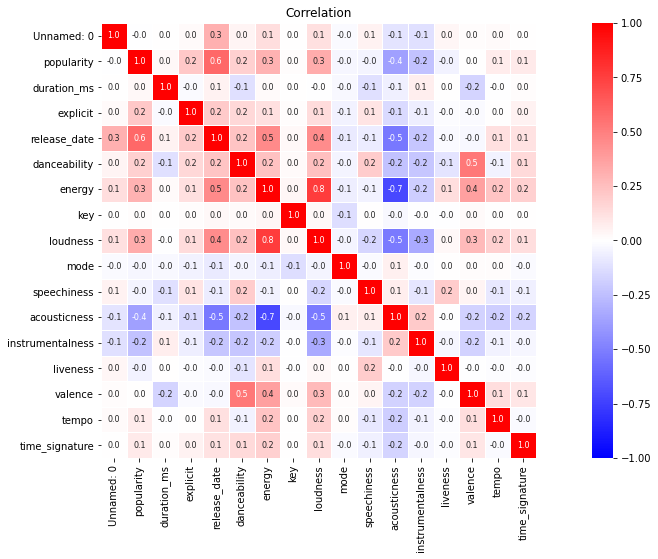

In [16]:
# Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, linewidths=.5, square=True, annot=True, annot_kws={'size':8}, fmt='.1f', cmap='bwr')
plt.title('Correlation')
plt.show()

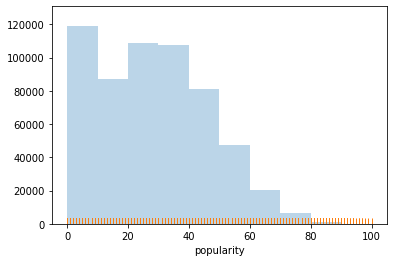

No handles with labels found to put in legend.


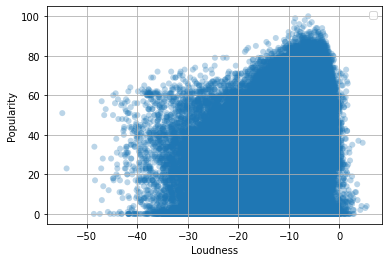

No handles with labels found to put in legend.


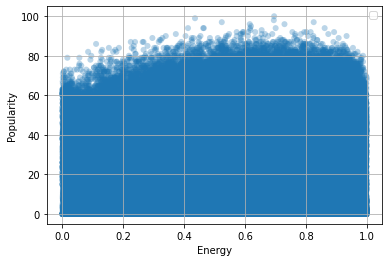

No handles with labels found to put in legend.


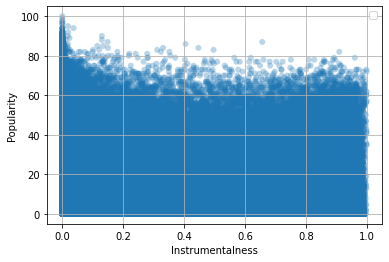

In [17]:
# Popularity EDA
df.pop = df.popularity

plt.hist(df.pop, alpha=.3)
sns.rugplot(df.pop)
plt.show()

# Popularity x Loudness
fig, ax = plt.subplots()
x = df.loudness
y = df.popularity
ax.scatter(x, y, alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.xlabel('Loudness')
plt.ylabel('Popularity')

plt.show()

# Popularity x Energy 
fig, ax = plt.subplots()
x = df.energy
y = df.popularity
ax.scatter(x, y, alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.show()

# Popularity x Acousticness 
fig, ax = plt.subplots()
x = df.instrumentalness
y = df.popularity
ax.scatter(x, y, alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')

plt.show()


<ipython-input-18-e72be895109d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dur = df.duration_ms


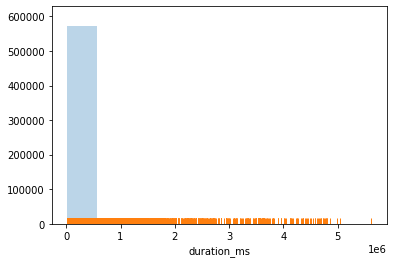

In [18]:
# Duration EDA
df.dur = df.duration_ms

plt.hist(df.dur, alpha=.3)
sns.rugplot(df.dur)
plt.show()

<ipython-input-19-5ee1a9e94eca>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.exp = df.explicit


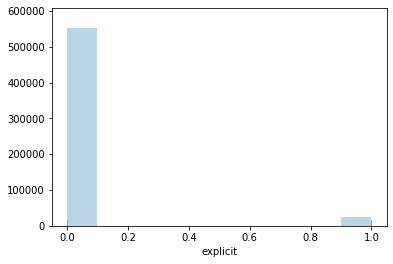

In [19]:
# Explicit EDA
df.exp = df.explicit

plt.hist(df.exp, alpha=.3)
sns.rugplot(df.exp)
plt.show()

<ipython-input-20-d1014a1c7928>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dance = df.danceability


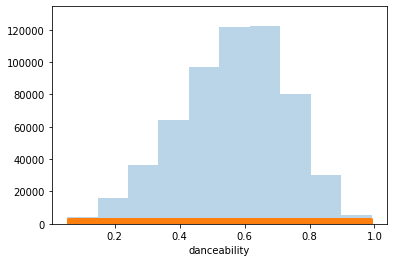

In [20]:
# Danceability EDA
df.dance = df.danceability

plt.hist(df.dance, alpha=.3)
sns.rugplot(df.dance)
plt.show()

<ipython-input-21-e7e4e3b4def3>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.eng = df.energy


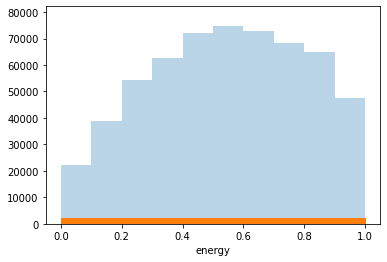

In [21]:
# Energy EDA
df.eng = df.energy

plt.hist(df.eng, alpha=.3)
sns.rugplot(df.eng)
plt.show()

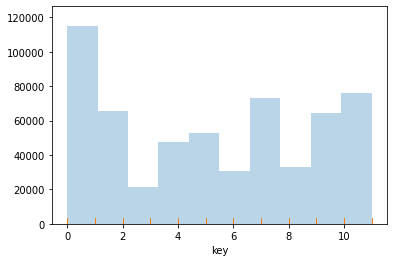

In [22]:
# key EDA
df.key = df.key

plt.hist(df.key, alpha=.3)
sns.rugplot(df.key)
plt.show()

<ipython-input-23-cb9a627442f0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.loud = df.loudness


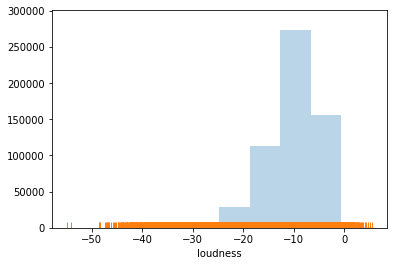

In [23]:
# Loudness EDA
df.loud = df.loudness

plt.hist(df.loud, alpha=.3)
sns.rugplot(df.loud)
plt.show()

TypeError: object of type 'method' has no len()

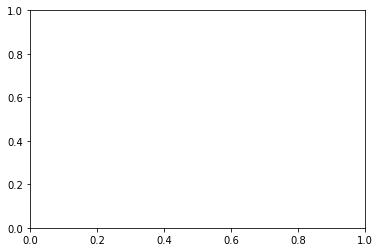

In [24]:
# Mode EDA
df.m = df.mode

plt.hist(df.m, alpha=.3)
sns.rugplot(df.m)
plt.show()

<ipython-input-53-54c1d3d29ca7>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sp = df.speechiness


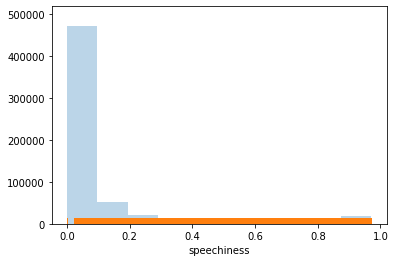

In [ ]:
# Speechiness EDA
df.sp = df.speechiness

plt.hist(df.sp, alpha=.3)
sns.rugplot(df.sp)
plt.show()

<ipython-input-58-783f5ceb3a98>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ac = df.acousticness


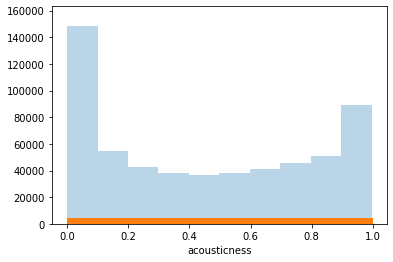

In [ ]:
# Acoustics EDA
df.ac = df.acousticness

plt.hist(df.ac, alpha=.3)
sns.rugplot(df.ac)
plt.show()

<ipython-input-59-e7271da3a284>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.inst = df.instrumentalness


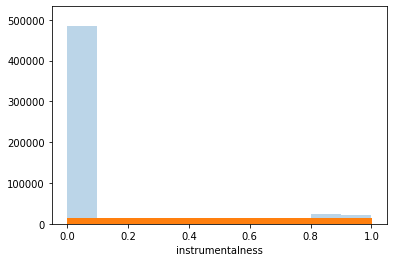

In [ ]:
# Instrumental EDA
df.inst = df.instrumentalness

plt.hist(df.inst, alpha=.3)
sns.rugplot(df.inst)
plt.show()

<ipython-input-60-8ff257664556>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.liv = df.liveness


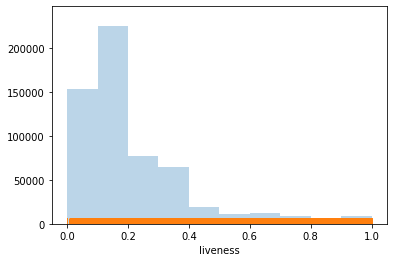

In [ ]:
# Liveliness EDA
df.liv = df.liveness

plt.hist(df.liv, alpha=.3)
sns.rugplot(df.liv)
plt.show()

<ipython-input-61-0d70f391e3f0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.val = df.valence


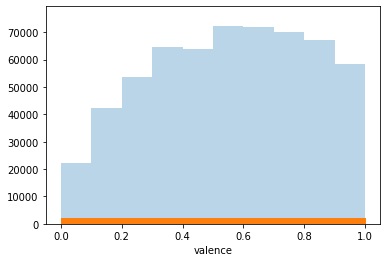

In [ ]:
# Valence EDA
df.val = df.valence

plt.hist(df.val, alpha=.3)
sns.rugplot(df.val)
plt.show()

<ipython-input-62-f5cdd8a3e7d0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.temp = df.tempo


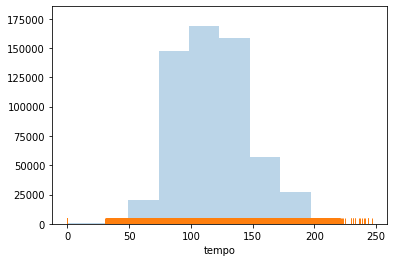

In [ ]:
# Tempo EDA
df.temp = df.tempo

plt.hist(df.temp, alpha=.3)
sns.rugplot(df.temp)
plt.show()

<ipython-input-63-3e096e114991>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ts = df.time_signature


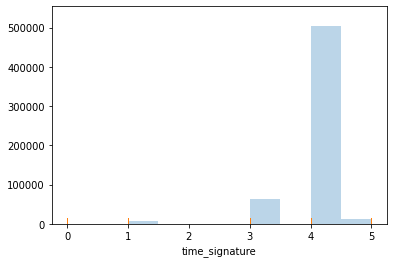

In [ ]:
# Time Signature EDA
df.ts = df.time_signature

plt.hist(df.ts, alpha=.3)
sns.rugplot(df.ts)
plt.show()

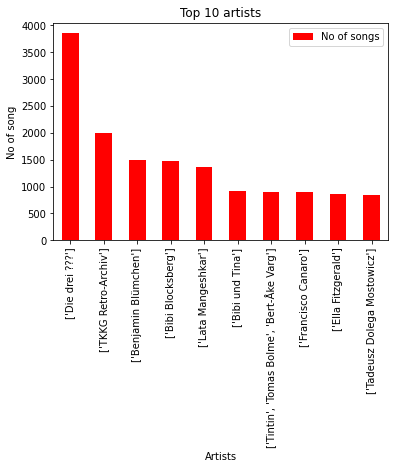

In [ ]:
# Top 10 artists
top_artists = pd.DataFrame({'No of songs':df['artists'].value_counts().head(10)})
top_artists.plot.bar(color='red')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

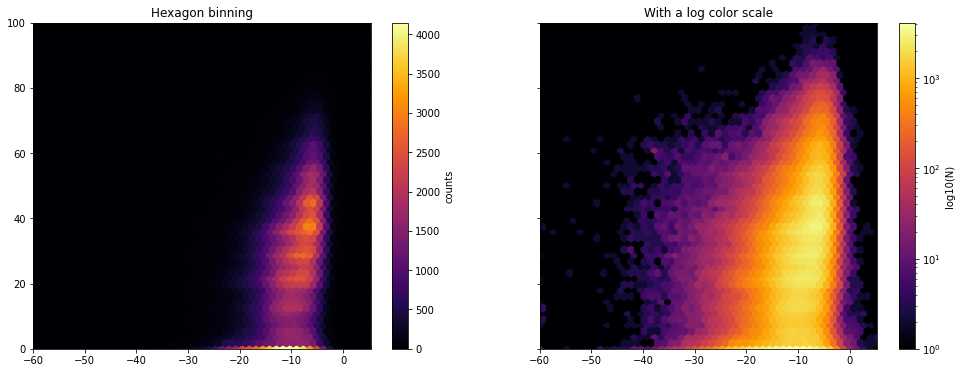

In [ ]:
# Popularity x Loudness Heatmap
x = df.loudness
y = df.popularity
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

/Users/vithushankuhan/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


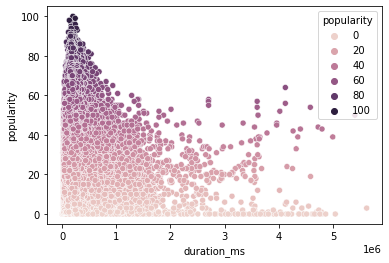

In [ ]:
sns.scatterplot(x="duration_ms", y="popularity", hue="popularity", data=df)

In [ ]:
sns.scatterplot(x="speechiness", y="popularity", hue="popularity", data=df)